
# basic data plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descriptive_tables import *

In [2]:
output_path="C:/Users/orlyk/readmissions/project/descriptives/population_general/"
output_figures="C:/Users/orlyk/readmissions/project/descriptives/population_general/figures/"
df=pd.read_pickle(r"C:\Users\orlyk\readmissions\project\preprocessed\population\population_for_model\df_basic_data.pkl")
df["LABEL_HOSP"]=np.where(df["LABEL_HOSP"]==1,"readmission","no_readmission")
df["LABEL_JUST_ER"]=np.where(df["LABEL_JUST_ER"]==1,"readmission","no_readmission")


plt.tight_layout()
list(df.columns)

['CaseNum',
 'PatNum',
 'age',
 'age_bins5',
 'sex',
 'EnterDate',
 'ExitDate',
 'year',
 'enter_month',
 'discharge_month',
 'LOS',
 'log_LOS',
 'entry_type',
 'discharge_type',
 'OrgMedAdmTatYahidaDesc',
 'dept_cat_adm',
 'dept_cat_disch',
 'LABEL_HOSP',
 'LABEL_JUST_ER']

<Figure size 432x288 with 0 Axes>

In [3]:

df_1=df[df["LABEL_HOSP"]=="readmission"]
df_0=df[df["LABEL_HOSP"]=="no_readmission"]

df_1_ER=df[df["LABEL_JUST_ER"]=="readmission"]
df_0_ER=df[df["LABEL_JUST_ER"]=="no_readmission"]

# age distributions

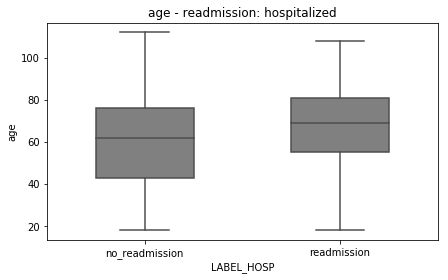

<Figure size 432x288 with 0 Axes>

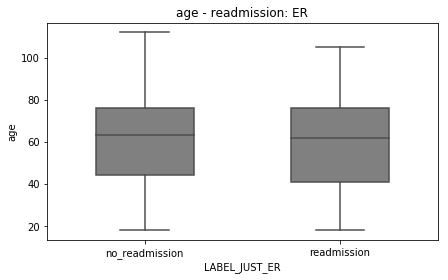

In [4]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["LABEL_HOSP"], y=df["age"], color="gray",width=0.5)
plt.title("age - readmission: hospitalized", fontdict=None, loc='center')
plt.figure()
plt.savefig(output_figures+"age_HOSP_boxplot.png")

plt.figure(figsize=(7,4))
sns.boxplot(x=df["LABEL_JUST_ER"], y=df["age"], color="gray",width=0.5)
plt.title("age - readmission: ER", fontdict=None, loc='center')
plt.savefig(output_figures+"age_ER_boxplot.png")


<Figure size 432x288 with 0 Axes>

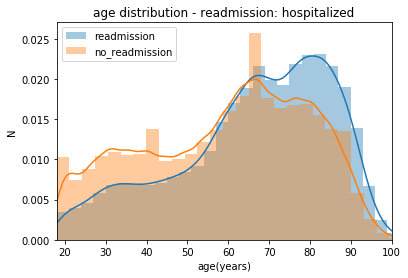

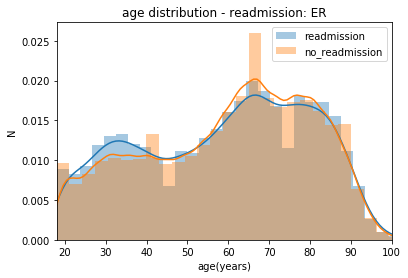

<Figure size 432x288 with 0 Axes>

In [5]:
ax=sns.distplot(df_1["age"],kde=True,bins=30,label="readmission")
ax=sns.distplot(df_0["age"],kde=True,bins=30,label="no_readmission")
ax.set(xlim=(18, 100))
plt.ylabel ("N")
plt.xlabel ("age(years)")
plt.title("age distribution - readmission: hospitalized", fontdict=None, loc='center')
ax.legend()
plt.savefig(output_figures+"age_HOSP_dist.png")

plt.figure()


ax=sns.distplot(df_1_ER["age"],kde=True,bins=30,label="readmission")
ax=sns.distplot(df_0_ER["age"],kde=True,bins=30,label="no_readmission")
ax.set(xlim=(18, 100))
plt.ylabel ("N")
plt.xlabel ("age(years)")
plt.title("age distribution - readmission: ER", fontdict=None, loc='center')
ax.legend()
plt.savefig(output_figures+"age_ER_dist.png")

plt.figure()



<Figure size 360x720 with 0 Axes>

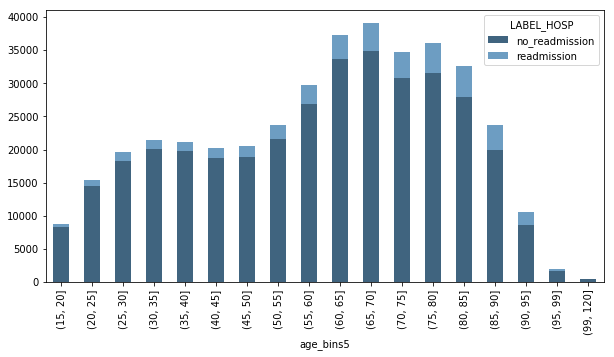

In [6]:
df_plot = df.groupby(['age_bins5', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='age_bins5', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.savefig(output_figures+"age_HOSP_dist.png")
plt.savefig(output_figures+"age_HOSP_bins.png")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


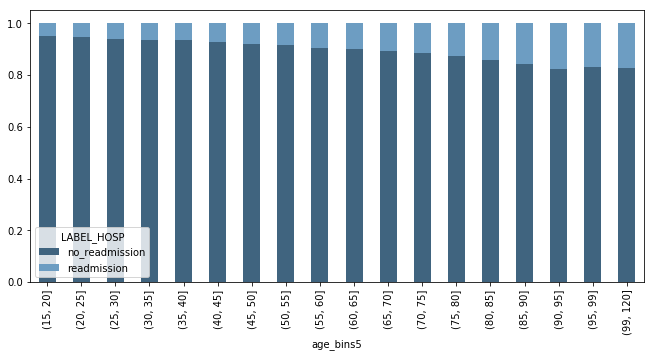

<Figure size 432x288 with 0 Axes>

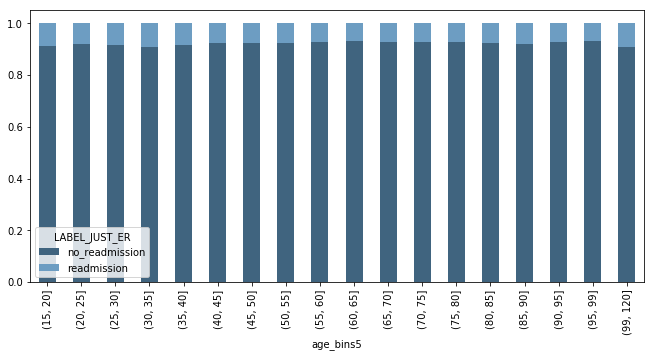

In [7]:
color = ['#40647F','#6D9DC2']

full_df = df[["age_bins5","LABEL_HOSP"]]

full_df["age_bins5"] = full_df["age_bins5"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = full_df.groupby("age_bins5")['LABEL_HOSP'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")
plt.savefig(output_figures+"age_HOSP_bins_cumulative.png")

plt.figure()
df_full_ER=df[["age_bins5","LABEL_JUST_ER"]]
df_full_ER["age_bins5"] = df_full_ER["age_bins5"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = df_full_ER.groupby("age_bins5")['LABEL_JUST_ER'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")
plt.savefig(output_figures+"age_ER_bins_cumulative.png")



# year of discharge

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 360x720 with 0 Axes>

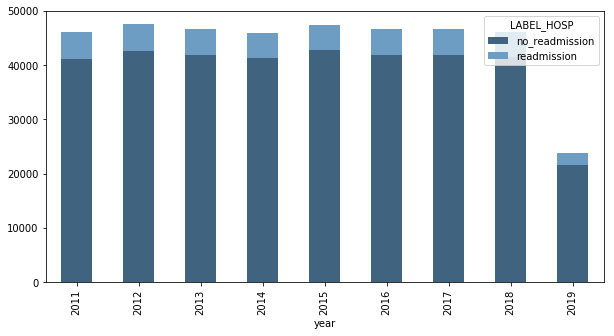

<Figure size 360x720 with 0 Axes>

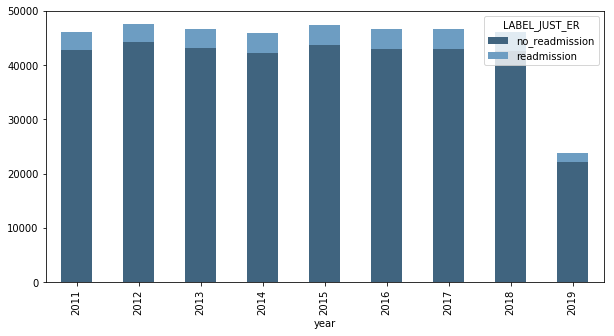

In [8]:
df_1["year"]=df_1["year"].astype(str)
df_0["year"]=df_0["year"].astype(str)
df["year"]=df["year"].astype(str)

df_plot = df.groupby(['year', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='year', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.savefig(output_figures+"year_HOSP.png")

df_plot = df.groupby(['year', 'LABEL_JUST_ER']).size().reset_index().pivot(columns='LABEL_JUST_ER', index='year', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.savefig(output_figures+"year_ER.png")




# LOS

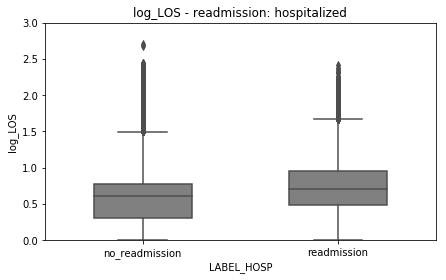

<Figure size 432x288 with 0 Axes>

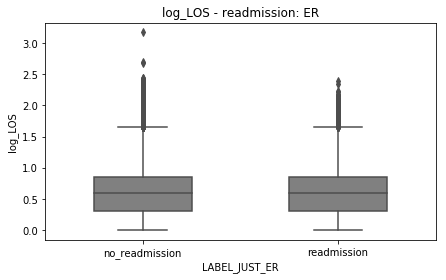

In [9]:
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=df["LABEL_HOSP"], y=df["log_LOS"], color="gray",width=0.5)
plt.title("log_LOS - readmission: hospitalized", fontdict=None, loc='center')
ax.set(ylim=(0, 3))
plt.savefig(output_figures+"log_LOS_HOSP.png")

plt.figure()

plt.figure(figsize=(7,4))
sns.boxplot(x=df["LABEL_JUST_ER"], y=df["log_LOS"], color="gray",width=0.5)
plt.title("log_LOS - readmission: ER", fontdict=None, loc='center')
plt.savefig(output_figures+"log_LOS_ER.png")


# Department - admission

<Figure size 360x720 with 0 Axes>

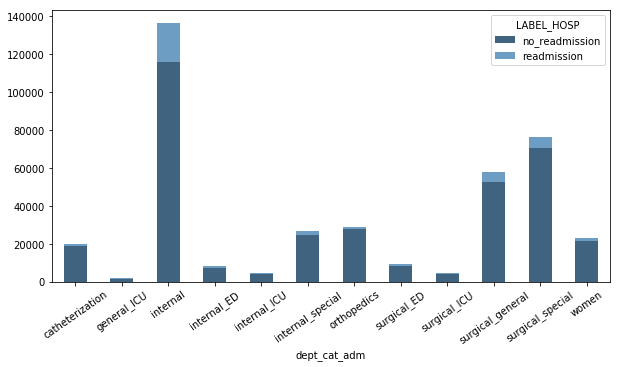

<Figure size 360x720 with 0 Axes>

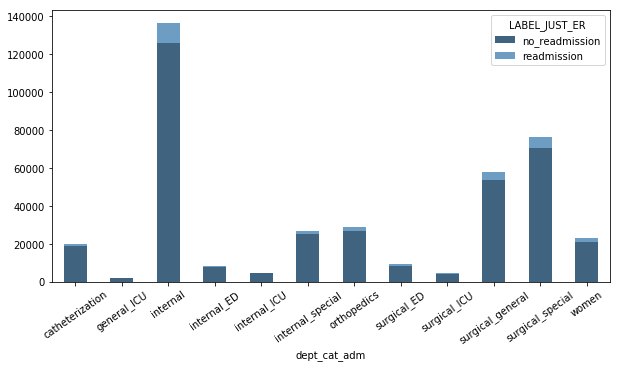

In [10]:

df_plot = df.groupby(['dept_cat_adm', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='dept_cat_adm', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=35)
plt.savefig(output_figures+"depts_adm_HOSP.png")

df_plot = df.groupby(['dept_cat_adm', 'LABEL_JUST_ER']).size().reset_index().pivot(columns='LABEL_JUST_ER', index='dept_cat_adm', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=35)
plt.savefig(output_figures+"depts_adm_ER.png")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


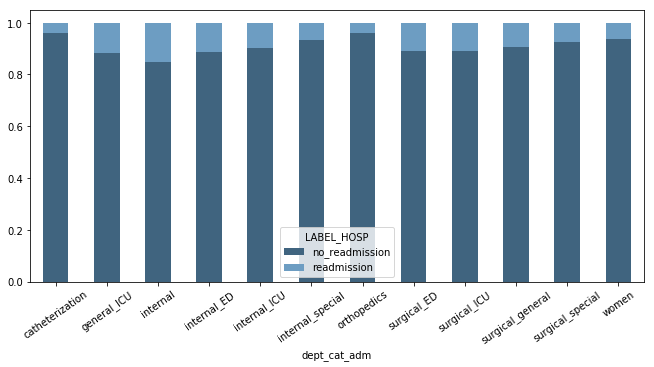

<Figure size 432x288 with 0 Axes>

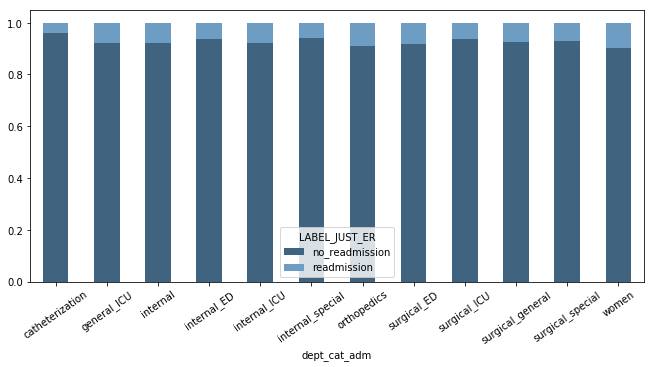

In [11]:
full_df=df.loc[df['dept_cat_adm'].notnull()]
full_df = full_df[["dept_cat_adm","LABEL_HOSP"]]

full_df["dept_cat_adm"] = full_df["dept_cat_adm"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = full_df.groupby("dept_cat_adm")['LABEL_HOSP'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")
plt.xticks(rotation=35)

plt.savefig(output_figures+"depts_adm_HOSP_cumulative.png")

plt.figure()
full_df=df.loc[df['dept_cat_adm'].notnull()]
df_full_ER = full_df[["dept_cat_adm","LABEL_JUST_ER"]]
df_full_ER["dept_cat_adm"] = df_full_ER["dept_cat_adm"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = df_full_ER.groupby("dept_cat_adm")['LABEL_JUST_ER'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")
plt.xticks(rotation=35)

plt.savefig(output_figures+"depts_adm_ER_cumulative.png")



# Department discharge

<Figure size 360x720 with 0 Axes>

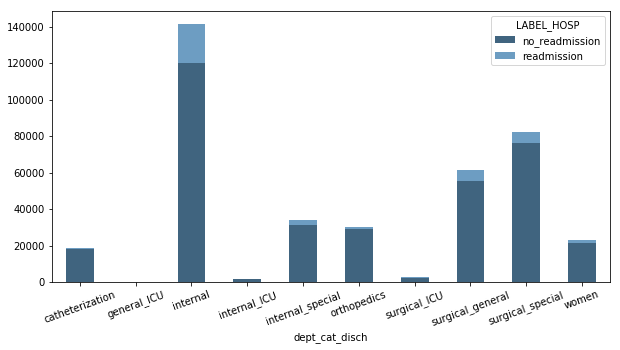

<Figure size 360x720 with 0 Axes>

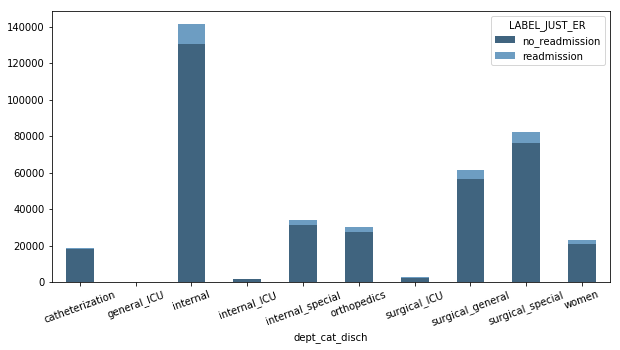

In [21]:
df_plot = df.groupby(['dept_cat_disch', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='dept_cat_disch', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=20)

plt.savefig(output_figures+"depts_disch_HOSP.png")

df_plot = df.groupby(['dept_cat_disch', 'LABEL_JUST_ER']).size().reset_index().pivot(columns='LABEL_JUST_ER', index='dept_cat_disch', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=20)

plt.savefig(output_figures+"depts_disch_ER.png")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


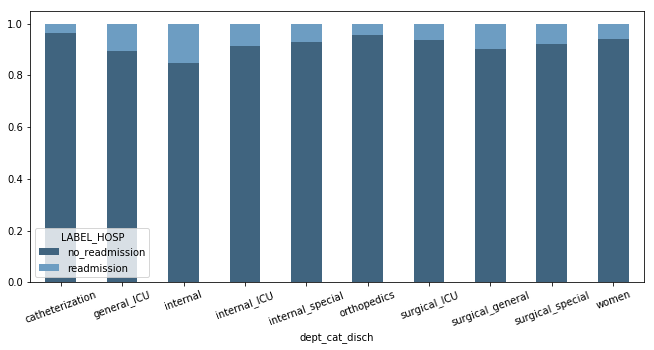

<Figure size 432x288 with 0 Axes>

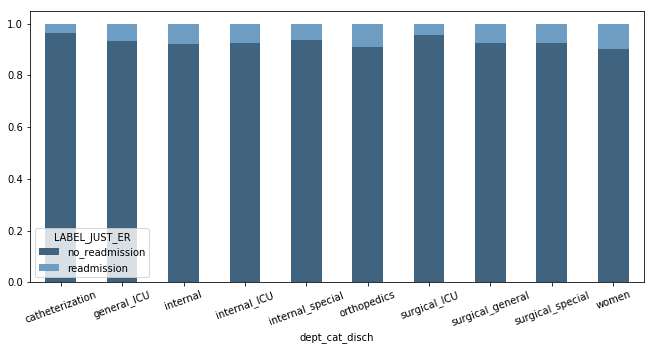

In [22]:
full_df=df.loc[df['dept_cat_disch'].notnull()]
full_df = full_df[["dept_cat_disch","LABEL_HOSP"]]

full_df["dept_cat_disch"] = full_df["dept_cat_disch"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = full_df.groupby("dept_cat_disch")['LABEL_HOSP'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
plt.xticks(rotation=20)
plt.savefig(output_figures+"depts_disch_HOSP_cumulative.png")

plt.figure()
full_df=df.loc[df['dept_cat_disch'].notnull()]
df_full_ER = full_df[["dept_cat_disch","LABEL_JUST_ER"]]
df_full_ER["dept_cat_disch"] = df_full_ER["dept_cat_disch"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = df_full_ER.groupby("dept_cat_disch")['LABEL_JUST_ER'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
plt.xticks(rotation=20)
plt.savefig(output_figures+"depts_disch_ER_cumulative.png")



# Discharge type

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 360x720 with 0 Axes>

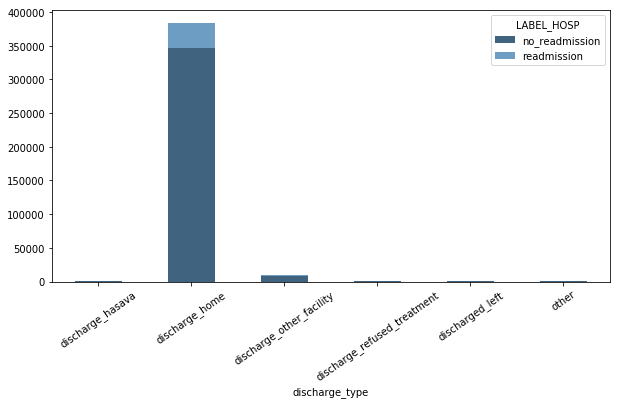

<Figure size 360x720 with 0 Axes>

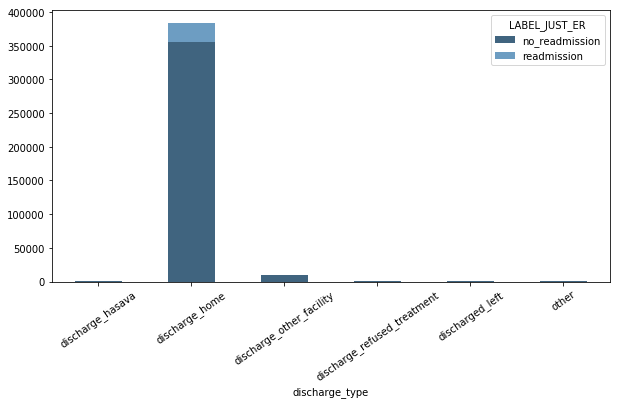

In [14]:

df_plot = df.groupby(['discharge_type', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='discharge_type', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=20)

df_plot = df.groupby(['discharge_type', 'LABEL_JUST_ER']).size().reset_index().pivot(columns='LABEL_JUST_ER', index='discharge_type', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)
plt.xticks(rotation=20)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


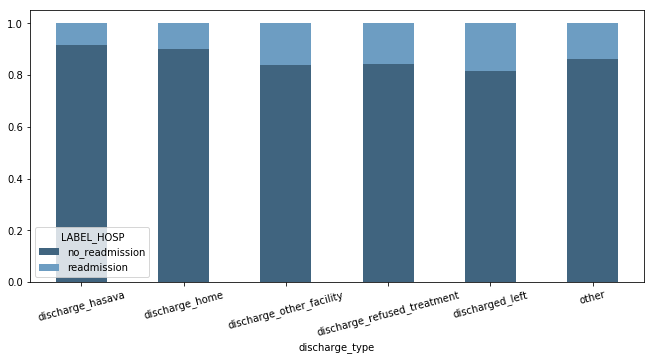

<Figure size 432x288 with 0 Axes>

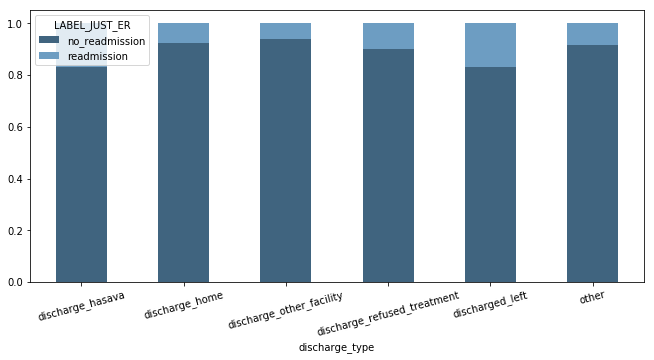

In [24]:
full_df=df.loc[df['discharge_type'].notnull()]
full_df = full_df[["discharge_type","LABEL_HOSP"]]



full_df["discharge_type"] = full_df["discharge_type"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = full_df.groupby("discharge_type")['LABEL_HOSP'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
plt.xticks(rotation=15)

plt.savefig(output_figures+"disch_type_HOSP_cumulative.png")

plt.figure()
full_df=df.loc[df['discharge_type'].notnull()]
df_full_ER = full_df[["discharge_type","LABEL_JUST_ER"]]
df_full_ER["discharge_type"] = df_full_ER["discharge_type"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = df_full_ER.groupby("discharge_type")['LABEL_JUST_ER'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
plt.xticks(rotation=15)
plt.savefig(output_figures+"disch_type_ER_cumulative.png")


<Figure size 360x720 with 0 Axes>

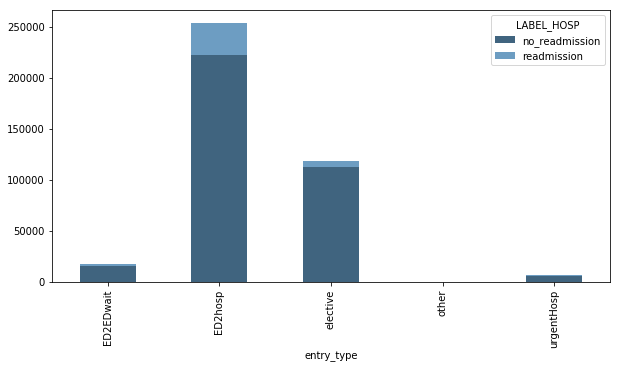

<Figure size 360x720 with 0 Axes>

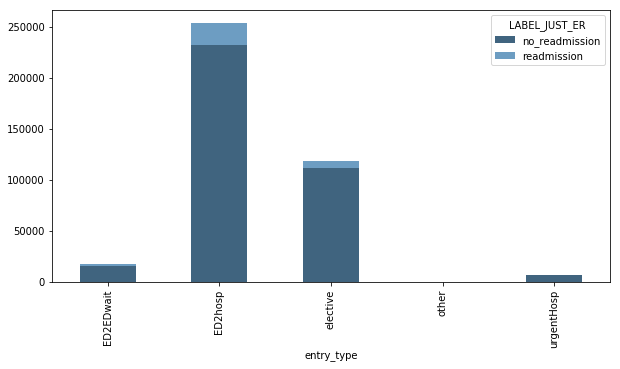

In [16]:
df_plot = df.groupby(['entry_type', 'LABEL_HOSP']).size().reset_index().pivot(columns='LABEL_HOSP', index='entry_type', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)

df_plot = df.groupby(['entry_type', 'LABEL_JUST_ER']).size().reset_index().pivot(columns='LABEL_JUST_ER', index='entry_type', values=0)
ax=plt.figure(figsize=(5,10))
color = {'lightsteelblue','navajowhite'}
color = ['#40647F','#6D9DC2']
ax=df_plot.plot(kind='bar', stacked=True,figsize=(10,5),color=color)

# Entry type

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


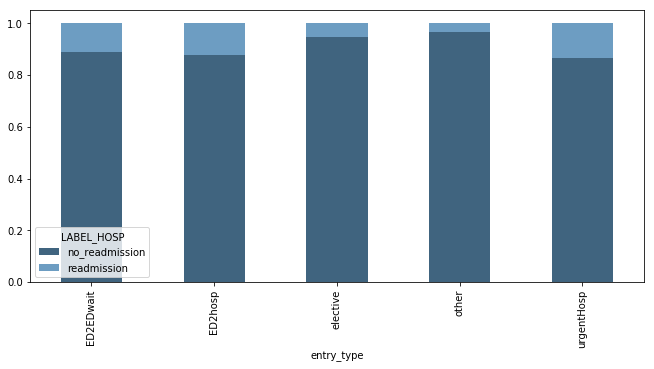

<Figure size 432x288 with 0 Axes>

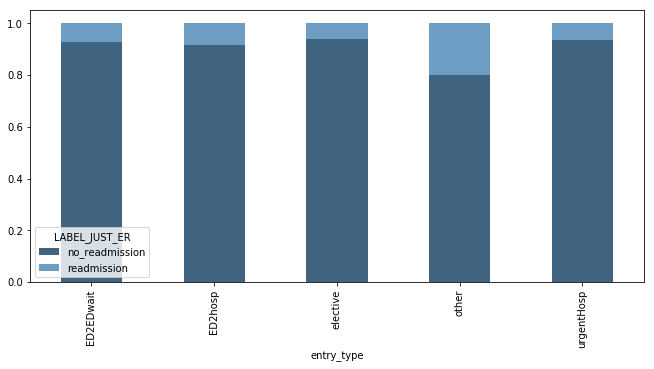

In [17]:
full_df=df.loc[df['entry_type'].notnull()]
full_df = full_df[["entry_type","LABEL_HOSP"]]

full_df["entry_type"] = full_df["entry_type"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = full_df.groupby("entry_type")['LABEL_HOSP'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")

plt.figure()
full_df=df.loc[df['entry_type'].notnull()]
df_full_ER = full_df[["entry_type","LABEL_JUST_ER"]]
df_full_ER["entry_type"] = df_full_ER["entry_type"].astype(str)
#full_df.loc[full_df["EG_CharlsScore"].astype(float) >=9.0, 'Charles'] = '9+'
props = df_full_ER.groupby("entry_type")['LABEL_JUST_ER'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',figsize=(11,5),color=color )
#plt.savefig(self.analysisPath +"/DeathCharls.png")

# sex

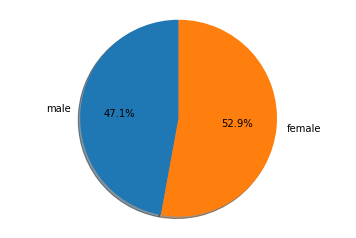

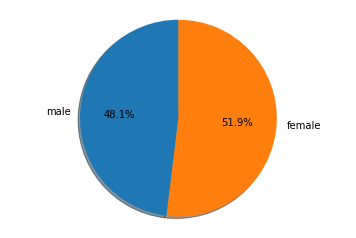

In [18]:
df_1=df[df["LABEL_HOSP"]=="readmission"]
df_0=df[df["LABEL_HOSP"]=="no_readmission"]

def pie(df):
    size_males=(df["sex"].count())-(df["sex"].sum())
    size_females=df["sex"].sum()

    labels = 'male', 'female'
    sizes = [size_males,size_females]
    explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    
pie(df_1)
pie(df_0)

# Descriptive tables

In [25]:
descriptives_all=describe_population(df,"all")
descriptives_HOSP_no_readmission=describe_population(df_0,"HOSP_no_readmission")
descriptives_HOSP_readmission=describe_population(df_1,"HOSP_readmission")

descriptives_ER_no_readmission=describe_population(df_0_ER,"ER_no_readmission")
descriptives_ER_readmission=describe_population(df_1_ER,"ER_readmission")

descriptives_HOSP=pd.merge(descriptives_all,descriptives_HOSP_no_readmission,on="vars")
descriptives_HOSP=pd.merge(descriptives_HOSP,descriptives_HOSP_readmission,on="vars")
 
descriptives_ER=pd.merge(descriptives_all,descriptives_ER_no_readmission,on="vars")
descriptives_ER=pd.merge(descriptives_ER,descriptives_ER_readmission,on="vars")

descriptives_HOSP.to_csv(output_path+"descriptives_general_HOSP.csv")
descriptives_ER.to_csv(output_path+"descriptives_general_ER.csv")


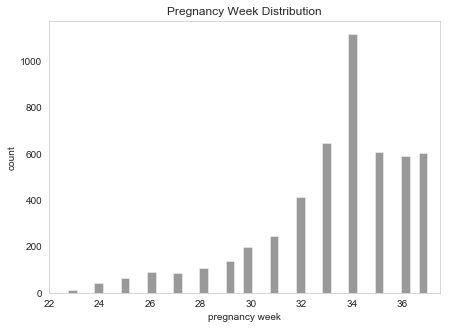

In [38]:
df=pd.read_excel(r"C:\Users\orlyk\Desktop\nicu_for alexis\admission_table.xlsx")
df=df[df["Pregnancy_Week"]<=37]
sns.color_palette()
sns.set_style("whitegrid")
ax=plt.figure(figsize=(7,5))
ax = sns.distplot(df["Pregnancy_Week"],kde=False,color='black')
plt.xlabel('pregnancy week')
plt.ylabel('count')
ax.set_xlim(22,37.5)
plt.title("Pregnancy Week Distribution", fontdict=None, loc='center')


ax.grid(False)